# **STROJNO UČENJE** 22./23.
## Vježba 03 - polinomijalna regresija, logistička regresija

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Podaci

In [13]:
!pwd

/content


In [14]:
import pandas as pd

data = pd.read_csv('drive/MyDrive/strojno_ucenje_2223/vj_02/diamonds.csv')
data.head(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


In [15]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53789,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53790,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53791,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53792,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Polinomijalna regresija

Radi se o poopćenju linearne regresije - predviđanje zavisne varijable se vrši ne pomoću linearne funkcije već pomoću funkcije koja ovisi o potencijama (većim od $1$) nezavisnih varijabli. Dakle, traži se **nelinearna** veza između zavisne varijable i nezavisnih varijabli.

Formalno, u slučaju samo jedne zavisne varijable $y$ i jedne nezavisne varijable $x$ imamo: $$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \ldots + \beta_n x^n + \epsilon$$ gdje je $\epsilon$ greška pri aproksimaciji.

Treniranje modela polinomijalne regresije jest nalaženje dobrih koeficijenata $\beta_i$, odnosno smanjivanje aproksimacijske greške $\epsilon$ što je više moguće. Stupanj $n$ polinoma u varijabli $x$ je **hiperparametar** ovog modela - utječe na kvalitetu algoritma, ali nije sami parametar modela kao što su npr. koeficijenti $\beta_i$ koji se ažuriraju tijekom treniranja.

Primijetimo da se polinomijalna regresija može shvatiti i kao poseban slučaj multilinearne regresije (regresije s više nezavisnih varijabli) ukoliko varijable $x, x^2, \ldots, x^n$ shvatimo kao različite nezavisne varijable $x_1, x_2, \ldots, x_n$.

Polinomijalna regresija se također može shvatiti kao linearni model i u drugom kontekstu - kontekstu linearnosti s obzirom na koeficijente $\beta_i$. U ovom slučaju se kaže da se govori o [*statistički linearnom*](https://en.wikipedia.org/wiki/Linear_model) modelu.

Gornja jednadžba je za najuži slučaj (gdje imamo samo jednu nezavisnu varijablu $x$). Postoje i općenitiji slučajevi sa više nezavisnih varijabli.

#### Jednostavni primjer

Na [linku](https://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions) možete u službenoj sklearn dokumentaciji vidjeti kako je zamišljeno da se polinomijalna regresija implementira pomoću te biblioteke. Budući da se u stvari radi o linearnom modelu, samo nad drugim značajkama, i dalje se koristi linearna regresija pri treniranju. Nove polinomijalne značajke se stvaraju pomoću metode [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) za transformiranje značajki, iz odgovarajućeg [modula](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing).

Polinomijalno-regresijski model stvaramo transformacijom "starih" značajki $x_1, x_2$ iz linearnog modela $y = \beta_0' + \beta_1' x_1 + \beta_2 x_2$ u "nove" značajke $x_1, x_2, x_1x_2, x_1^2, x_2^2$ koje koristimo u novome modelu $$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1x_2 + \beta_4 x_1^2 + \beta_5 x_2^2.$$

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = [[0.44, 0.68], [0.99, 0.23]]
vector = [109.85, 155.72]
predict = [[0.49, 0.18]]

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X)
predict_ = poly.fit_transform(predict)

clf = LinearRegression()
clf.fit(X_, vector)
print('predikcija: ', clf.predict(predict_))
print('koeficijenti: ', clf.coef_)

predikcija:  [126.84247142]
koeficijenti:  [  0.          19.4606578  -15.92235638  27.82874066  -2.52988551
 -14.48934431]


#### Primjer nad podacima diamonds.csv

In [17]:
from sklearn.model_selection import train_test_split

train_X, test_X = train_test_split(data)
train_y = train_X['price']
test_y = test_X['price']

train_X.drop(['price'], axis=1, inplace=True)
test_X.drop(['price'], axis=1, inplace=True)

train_X.shape, test_X.shape

((40345, 9), (13449, 9))

In [19]:
cut = lambda x : 1 if x=='Fair' else ( 2 if x=='Good' else ( 3 if x=='Very Good' else ( 4 if x=='Premium' else (5))))
train_X['cut'] = train_X['cut'].apply(cut)
test_X['cut'] = test_X['cut'].apply(cut)

color = lambda x : 1 if x=='D' else ( 2 if x=='E' else ( 3 if x=='F' else ( 4 if x=='G' else ( 5 if x=='H' else ( 6 if x=='I' else (7))))))
train_X['color'] = train_X['color'].apply(color)
test_X['color'] = test_X['color'].apply(color)

clarity = lambda x : 1 if x=='I1' else ( 2 if x=='SI2' else ( 3 if x=='SI1' else ( 4 if x=='VS2' else ( 5 if x=='VS1' else ( 6 if x=='VVS2' else ( 7 if x=='VVS1' else (8)))))))
train_X['clarity'] = train_X['clarity'].apply(clarity)
test_X['clarity'] = test_X['clarity'].apply(clarity)

train_X, test_X

(       carat  cut  color  clarity  depth  table     x     y     z
 12966   1.05    5      7        8   60.3   61.0  6.62  6.57  3.98
 32927   0.31    5      7        8   60.2   55.0  4.43  4.45  2.67
 52584   0.70    5      7        8   62.5   55.0  5.65  5.68  3.54
 48218   0.56    5      7        8   61.1   57.0  5.33  5.37  3.27
 22817   1.62    5      7        8   62.6   58.0  7.57  7.45  4.70
 ...      ...  ...    ...      ...    ...    ...   ...   ...   ...
 25639   0.35    5      7        8   63.0   57.0  4.46  4.52  2.83
 40603   0.37    5      7        8   61.6   55.0  4.62  4.63  2.85
 52175   0.50    5      7        8   60.1   56.0  5.16  5.19  3.11
 25318   0.31    5      7        8   61.7   55.0  4.38  4.41  2.71
 27549   2.66    5      7        8   64.3   60.0  8.71  8.65  5.58
 
 [40345 rows x 9 columns],
        carat  cut  color  clarity  depth  table     x     y     z
 49477   0.32    5      7        8   63.1   56.0  4.38  4.34  2.75
 17531   1.06    5      7        

In [20]:
train_X = train_X.to_numpy()
test_X = test_X.to_numpy()
train_X

array([[1.05, 5.  , 7.  , ..., 6.62, 6.57, 3.98],
       [0.31, 5.  , 7.  , ..., 4.43, 4.45, 2.67],
       [0.7 , 5.  , 7.  , ..., 5.65, 5.68, 3.54],
       ...,
       [0.5 , 5.  , 7.  , ..., 5.16, 5.19, 3.11],
       [0.31, 5.  , 7.  , ..., 4.38, 4.41, 2.71],
       [2.66, 5.  , 7.  , ..., 8.71, 8.65, 5.58]])

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)
train_X

array([[ 5.32285118e-01,  0.00000000e+00,  0.00000000e+00, ...,
         7.93215073e-01,  7.30775982e-01,  6.21838269e-01],
       [-1.03002908e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.16170211e+00, -1.12372794e+00, -1.22631849e+00],
       [-2.06647271e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -7.26614885e-02, -4.77657578e-02,  1.08332609e-03],
       ...,
       [-6.28894350e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -5.10063051e-01, -4.76401098e-01, -6.05563550e-01],
       [-1.03002908e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.20633493e+00, -1.15871858e+00, -1.16988622e+00],
       [ 3.93137411e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.65886663e+00,  2.55028926e+00,  2.87912897e+00]])

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])

model.fit(train_X, train_y)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('linear', LinearRegression(fit_intercept=False))])

In [23]:
pred_y = model.predict(test_X)
print('R2 = ', r2_score(test_y, pred_y), ' RMSE = ', sqrt(mean_squared_error(test_y, pred_y)))
# model.named_steps['linear'].coef_

R2 =  0.6981717823115372  RMSE =  2184.675713354385


In [24]:
model.named_steps['linear'].coef_

array([ 3.52980076e+03,  4.01567400e+03, -4.35704806e-11, -3.37649908e-11,
        3.18323146e-12, -1.80760739e+02, -1.55850554e+02, -1.76143892e+03,
        1.51434393e+03, -1.27341209e+01, -9.30649443e+02, -1.13686838e-12,
        3.52429197e-12,  2.27373675e-13, -1.19306632e+02, -6.43144926e+01,
        1.70888677e+03, -8.84432377e+02,  1.69220590e+02, -3.41060513e-12,
        4.54747351e-13,  4.54747351e-13,  3.63797881e-12,  9.09494702e-13,
        0.00000000e+00,  9.09494702e-13, -4.54747351e-13,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -9.97284608e+00, -2.57185476e+01,  9.76580702e+02, -5.48839829e+02,
       -3.87561252e+02,  1.50595507e+01, -1.61309513e+02, -4.17889483e+02,
        5.68330424e+02,  8.37787028e+02,  4.17371304e+02, -6.81046483e+03,
       -9.60576525e+02,  

Vidimo da smo dobili loš rezultat. Ideje kako ga se može pokušati popraviti:
- uzeti manje značajki (stupaca) za predviđanje
- isprobati kombinacije s visoko/nisko koreliranim varijablama s varijablom price
- koristiti drugi stupanj polinoma
- koristiti drugi model (odustati od polinomijalne regresije)

## Logistička regresija

[Logistička regresija](https://en.wikipedia.org/wiki/Logistic_regression) je statistički model koji predviđa vjerojatnosti za događaje. Usprkos nazivu, u kontekstu strojnog učenja se koristi za klasifikacijske modele. Dakle, zavisna varijabla je kategorička. Nezavisne varijable mogu biti kategoričke ili numeričke.

Logističkom regresijom se pomoću takozvane *sigmoidne* funkcije modelira vjerojatnost da instanca zavisne varijable pripada pojedinoj klasi (kategoriji). Najčešće korišteni primjer sigmoidne funkcije je tzv. **logistička funkcija:** $$\sigma : \mathbb{R} ⟶ \mathbb{R},$$ $$\sigma(z) = \frac{1}{1 + e^{-z}}.$$

[Standardna](https://en.wikipedia.org/wiki/Logistic_function) logistička funkcija poprima vrijednosti na intervalu $\sigma(z) \in \left<0, 1\right>$.

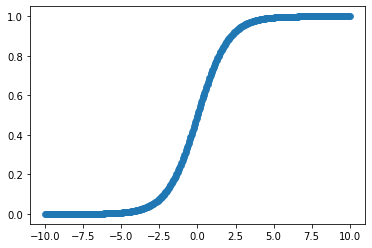

In [25]:
import seaborn as sns
import numpy as np

x = np.linspace(-10,10,500)
y = 1/(1+np.exp(-x))
data = np.concatenate([x,y], axis=0)
sns.regplot(x=x, y=y, data=data, logistic=True, ci=None)

U binarnom slučaju (kad imamo 2 klase), kaže se da instanca zavisne varijable pripada klasi 1 ukoliko je $\sigma(z) < 0.5$, a da pripada klasi 2 ukoliko je $\sigma(z) \geq 0.5$.

U općenitijim slučajevima s više klasa, može se zadati i drugačiji prag osim $0.5$. Obično se odaberu ravnomjerni intervali. Dakle, u slučaju s npr. 4 klase bismo imali:
- $y_i$ pripada klasi 1 ako je $\sigma(y_i) \leq 0.25$,
- $y_i$ pripada klasi 2 ako je $0.25 < \sigma(y_i) \leq 0.5$,
- $y_i$ pripada klasi 3 ako je $0.5 < \sigma(y_i) \leq 0.75$,
- $y_i$ pripada klasi 4 ako je $0.75 < \sigma(y_i)$.

### Primjer iz sklearn biblioteke

Koristimo sklearn ugrađeni skup podataka [digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) koji sadržava podatke o znamenkama. Pokušavamo klasificirati znamenke - 10 klasa (0,1,2,...,9).

In [26]:
from sklearn import datasets, linear_model

X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max()

n_samples = len(X_digits)

# uzimamo 90% podataka u skup za treniranje
X_train = X_digits[: int(0.9 * n_samples)]
y_train = y_digits[: int(0.9 * n_samples)]
X_test = X_digits[int(0.9 * n_samples) :]
y_test = y_digits[int(0.9 * n_samples) :]

X_train[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

<Figure size 432x288 with 0 Axes>

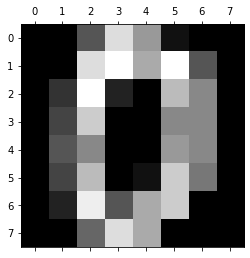

In [27]:
import matplotlib.pyplot as plt

digits = datasets.load_digits()
plt.gray()
plt.matshow(digits.images[0])
plt.show()

In [28]:
X_digits.shape, y_digits.shape

((1797, 64), (1797,))

In [29]:
logistic = linear_model.LogisticRegression(max_iter=1000)

print("LogisticRegression score: %f" % logistic.fit(X_train, y_train).score(X_test, y_test))

LogisticRegression score: 0.933333


In [30]:
X_test[0]

array([0.    , 0.    , 0.3125, 1.    , 1.    , 0.1875, 0.    , 0.    ,
       0.    , 0.    , 0.5625, 1.    , 0.4375, 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.75  , 0.9375, 0.125 , 0.    , 0.    , 0.    ,
       0.    , 0.0625, 0.9375, 1.    , 0.9375, 0.25  , 0.    , 0.    ,
       0.    , 0.    , 0.5625, 0.8125, 1.    , 0.5625, 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.875 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.3125, 0.75  , 1.    , 0.5   , 0.    , 0.    ,
       0.    , 0.    , 0.1875, 0.9375, 0.9375, 0.0625, 0.    , 0.    ])

Uzmimo neku znamenku i pogledajmo predviđa li naš model točno njenu klasu.

In [31]:
i = 100

In [32]:
digits.images[i]

array([[ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16.,  5.,  2.,  0.,  0.],
       [ 0.,  0., 15., 12.,  1., 16.,  4.,  0.],
       [ 0.,  4., 16.,  2.,  9., 16.,  8.,  0.],
       [ 0.,  0., 10., 14., 16., 16.,  4.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]])

In [33]:
digits.data[i]

array([ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
        0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  2.,  0.,  0.,  0.,  0.,
       15., 12.,  1., 16.,  4.,  0.,  0.,  4., 16.,  2.,  9., 16.,  8.,
        0.,  0.,  0., 10., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
       13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.])

Moramo procesirati i odabranu znamenku na jednak način kao što su procesirani podaci nad kojima je model treniran.

In [34]:
our_digit = digits.data[i] / digits.data.max()
our_digit

array([0.    , 0.    , 0.    , 0.125 , 0.8125, 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.5   , 0.9375, 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.3125, 1.    , 0.3125, 0.125 , 0.    , 0.    ,
       0.    , 0.    , 0.9375, 0.75  , 0.0625, 1.    , 0.25  , 0.    ,
       0.    , 0.25  , 1.    , 0.125 , 0.5625, 1.    , 0.5   , 0.    ,
       0.    , 0.    , 0.625 , 0.875 , 1.    , 1.    , 0.25  , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.8125, 0.5   , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.8125, 0.375 , 0.    , 0.    ])

predikcija:  [4]
stvarna labela:  4



<Figure size 432x288 with 0 Axes>

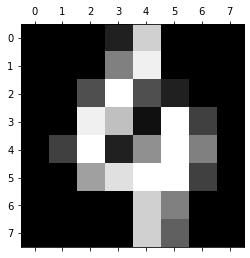

In [35]:
prediction = logistic.predict(our_digit.reshape(1, -1))
print('predikcija: ', prediction)
print('stvarna labela: ', digits.target[i])
print()

plt.gray()
plt.matshow(digits.images[i])
plt.show()

### Primjer na skupu podataka diamonds.csv

Predviđamo varijablu *cut*.

In [36]:
data = pd.read_csv('drive/MyDrive/strojno_ucenje_2223/vj_02/diamonds.csv')

data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [37]:
from sklearn.model_selection import train_test_split

X, y = data.drop('cut', axis=1), data['cut']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
X_train

,carat,color,clarity,depth,table,price,x,y,z
4380,0.31,I,VVS1,62.8,55.0,571,4.33,4.36,2.73
11237,1.16,G,SI2,62.5,58.0,4969,6.72,6.68,4.19
24294,1.53,F,SI1,61.5,56.0,12616,7.38,7.42,4.56
40822,0.42,D,VS1,60.8,59.0,1179,4.79,4.85,2.93
14125,1.31,I,SI2,59.1,59.0,5744,7.20,7.15,4.24
...,...,...,...,...,...,...,...,...,...
11284,1.00,H,VS2,60.4,58.0,4984,6.51,6.46,3.92
44732,0.63,G,SI1,61.7,54.0,1628,5.52,5.56,3.42
38158,0.32,J,SI1,61.8,54.9,384,4.39,4.42,2.72
860,0.90,J,SI1,62.8,59.0,2871,6.13,6.03,3.82


In [39]:
y_train

4380     Very Good
11237      Premium
24294        Ideal
40822      Premium
14125      Premium
           ...    
11284      Premium
44732        Ideal
38158        Ideal
860        Premium
15795      Premium
Name: cut, Length: 36041, dtype: object

In [40]:
cut = lambda x : 1 if x=='Fair' else ( 2 if x=='Good' else ( 3 if x=='Very Good' else ( 4 if x=='Premium' else (5))))
y_train = y_train.apply(cut)
y_test = y_test.apply(cut)

color = lambda x : 1 if x=='D' else ( 2 if x=='E' else ( 3 if x=='F' else ( 4 if x=='G' else ( 5 if x=='H' else ( 6 if x=='I' else (7))))))
X_train['color'] = X_train['color'].apply(color)
X_test['color'] = X_test['color'].apply(color)

clarity = lambda x : 1 if x=='I1' else ( 2 if x=='SI2' else ( 3 if x=='SI1' else ( 4 if x=='VS2' else ( 5 if x=='VS1' else ( 6 if x=='VVS2' else ( 7 if x=='VVS1' else (8)))))))
X_train['clarity'] = X_train['clarity'].apply(clarity)
X_test['clarity'] = X_test['clarity'].apply(clarity)

y_train, y_test

(4380     3
 11237    4
 24294    5
 40822    4
 14125    4
         ..
 11284    4
 44732    5
 38158    5
 860      4
 15795    4
 Name: cut, Length: 36041, dtype: int64, 43520    1
 4264     3
 47271    5
 44300    4
 13943    5
         ..
 23976    5
 45336    4
 14815    4
 39190    5
 12953    4
 Name: cut, Length: 17753, dtype: int64)

In [41]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

X_train

array([[0.31, 6.  , 7.  , ..., 4.33, 4.36, 2.73],
       [1.16, 4.  , 2.  , ..., 6.72, 6.68, 4.19],
       [1.53, 3.  , 3.  , ..., 7.38, 7.42, 4.56],
       ...,
       [0.32, 7.  , 3.  , ..., 4.39, 4.42, 2.72],
       [0.9 , 7.  , 3.  , ..., 6.13, 6.03, 3.82],
       [1.01, 4.  , 5.  , ..., 6.36, 6.31, 3.97]])

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-1.02889934,  1.40932412,  1.80126789, ..., -1.24901263,
        -1.22493017, -1.16421729],
       [ 0.75334352,  0.23545191, -1.24613795, ...,  0.87340264,
         0.83572256,  0.92955   ],
       [ 1.52914335, -0.3514842 , -0.63665678, ...,  1.45950895,
         1.49299972,  1.46016226],
       ...,
       [-1.00793177,  1.99626022, -0.63665678, ..., -1.19573024,
        -1.17163743, -1.17855817],
       [ 0.20818688,  1.99626022, -0.63665678, ...,  0.34945912,
         0.25838451,  0.39893774],
       [ 0.43883008,  0.23545191,  0.58230555, ...,  0.55370829,
         0.50708398,  0.61405082]])

In [43]:
from sklearn.linear_model import LogisticRegression
import numpy as np

for max_iter in [100, 500, 1000]:
  logreg = LogisticRegression(solver='sag', multi_class='multinomial', max_iter=max_iter)
  logreg.fit(X_train, y_train)

  print('score je {} za {} iteracija'.format(np.round(logreg.score(X_test, y_test), 2), max_iter))
  print(logreg.score(X_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


score je 0.65 za 100 iteracija
0.6540303047372276
score je 0.65 za 500 iteracija
0.6539176477215118
score je 0.65 za 1000 iteracija
0.6539176477215118


In [44]:
y_pred = logreg.predict(X_test) # predviđanje
y_pred

array([5, 3, 5, ..., 4, 5, 4])

In [46]:
for solver in ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']:
  logreg = LogisticRegression(solver=solver, max_iter=1000)
  logreg.fit(X_train, y_train)

  print('score je {} za {} solver'.format(np.round(logreg.score(X_test, y_test), 2), solver))
  print(logreg.score(X_test, y_test))

score je 0.65 za liblinear solver
0.6514955218836253
score je 0.65 za lbfgs solver
0.6539739762293697
score je 0.65 za newton-cg solver
0.6539176477215118
score je 0.65 za sag solver
0.6539176477215118
score je 0.65 za saga solver
0.6539176477215118


Točnost 65% nije toliko loše za 5 klasa! Naime, vjerojatnost slučajnog pogotka za 5 klasa je 20% (a ne 50% kao za binarnu klasifikaciju). Naš klasifikator je značajno bolji od slučajnog pogađanja.

Također vidimo da broj iteracija za ovaj skup podataka nema utjecaja na točnost, kao ni odabir optimizacijske metode.